In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [24]:
df= pd.read_csv("spotify_songs_dataset.csv")

In [25]:
df

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.00,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.00,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.00,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.00,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.00,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.00,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,NaN
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.00,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,NaN
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.00,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,NaN


In [26]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (50000, 15)


In [27]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [29]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['duration'] = (
    df['duration']
    .astype(str)                         
    .str.replace(',', '', regex=False)   
    .pipe(pd.to_numeric, errors='coerce') 
)


In [58]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

In [59]:
df['language'].fillna(df['language'].mode()[0], inplace=True)

In [32]:
df.drop(columns=['collaboration'], inplace=True)

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [34]:
df['year'] = df['release_date'].dt.year

In [35]:
df['duration'] = df['duration'].astype(int)

In [36]:
df.dtypes

song_id                     object
song_title                  object
artist                      object
album                       object
genre                       object
release_date        datetime64[ns]
duration                     int32
popularity                   int64
stream                       int64
language                    object
explicit_content            object
label                       object
composer                    object
producer                    object
year                         int32
dtype: object

In [60]:
df.describe()

,release_date,duration,popularity,stream,year
count,50000,"50,000.00","50,000.00","50,000.00","50,000.00"
mean,2009-10-01 17:25:40.224000,239.59,50.78,"50,191,831.85","2,009.25"
min,1994-10-06 00:00:00,33.00,1.00,"1,899.00","1,994.00"
25%,2002-03-25 18:00:00,210.00,26.00,"25,233,107.50","2,002.00"
50%,2009-09-25 00:00:00,239.00,51.00,"50,421,686.00","2,009.00"
75%,2017-04-19 00:00:00,269.00,76.00,"75,190,637.50","2,017.00"
max,2024-10-05 00:00:00,433.00,100.00,"99,999,128.00","2,024.00"
std,NaN,47.56,28.95,"28,936,244.08",8.69


In [61]:
def categorize_popularity(score):
    if score >= 80:
        return "Very Popular"
    elif score >= 50:
        return "Popular"
    else:
        return "Less Popular"

df['popularity_category'] = df['popularity'].apply(categorize_popularity)

In [38]:
df['duration'].min()

33

In [39]:
def categorize_duration(seconds):
    if seconds < 120:
        return "Short"
    elif 120 <= seconds < 300:
        return "Medium"
    else:
        return "Long"

df['duration_category'] = df['duration'].apply(categorize_duration)


# Histogram of Song Durations

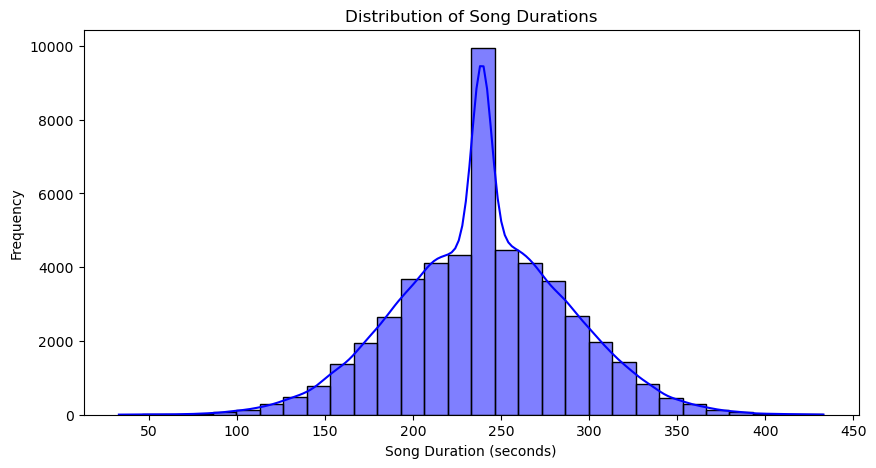

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=30, kde=True, color="blue")
plt.xlabel("Song Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Song Durations")
plt.show()

# Countplot for Duration Categories

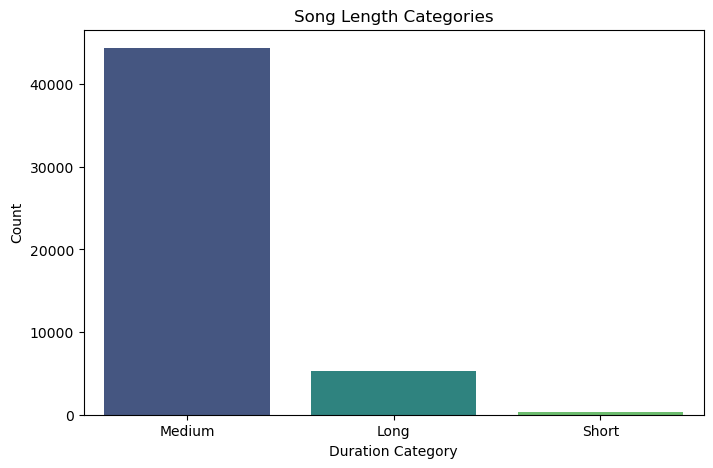

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['duration_category'],hue=df['duration_category'], palette="viridis")
plt.xlabel("Duration Category")
plt.ylabel("Count")
plt.title("Song Length Categories")
plt.show()


# Box Plot of Popularity by Genre

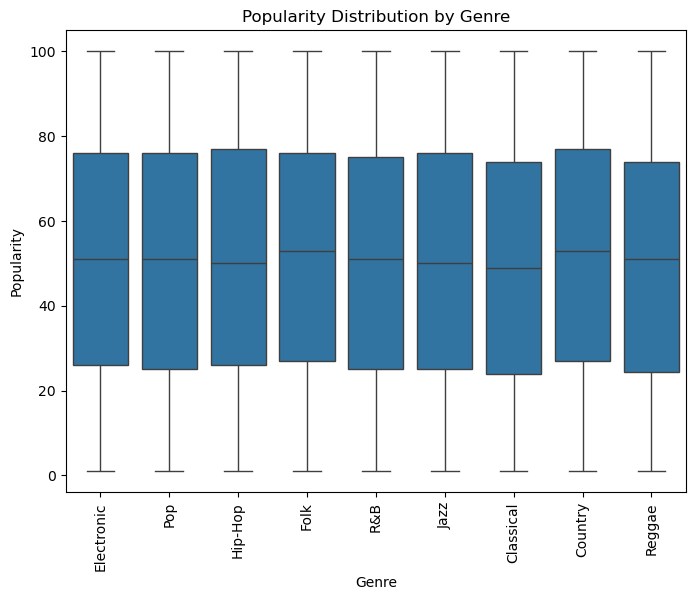

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="genre", y="popularity", data=df)
plt.xticks(rotation=90)  
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Popularity Distribution by Genre")
plt.show()


In [43]:
df.to_csv('cleaned_spotify_songs.csv', index=False)

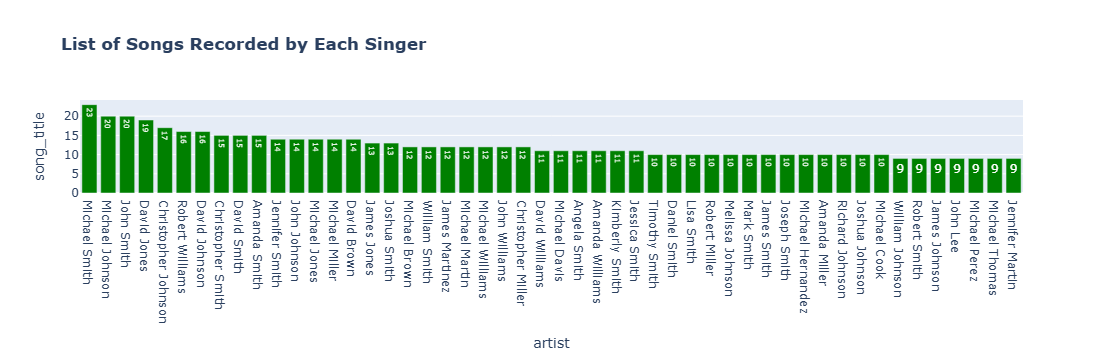

In [47]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song_title',ascending=False).head(50),
       x='artist',y='song_title',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],
       text='song_title',title='<b> List of Songs Recorded by Each Singer')

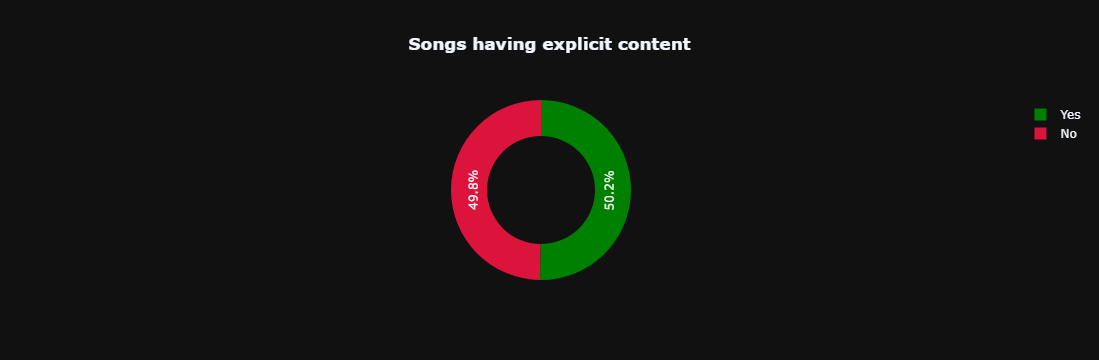

In [56]:
fig=px.pie(df.groupby('explicit_content',as_index=False).count().sort_values(by='song_title',ascending=False),
           names='explicit_content',values='song_title',labels={'song_title':'Total songs'},
           hole=.6,color_discrete_sequence=['green','crimson'],
           template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

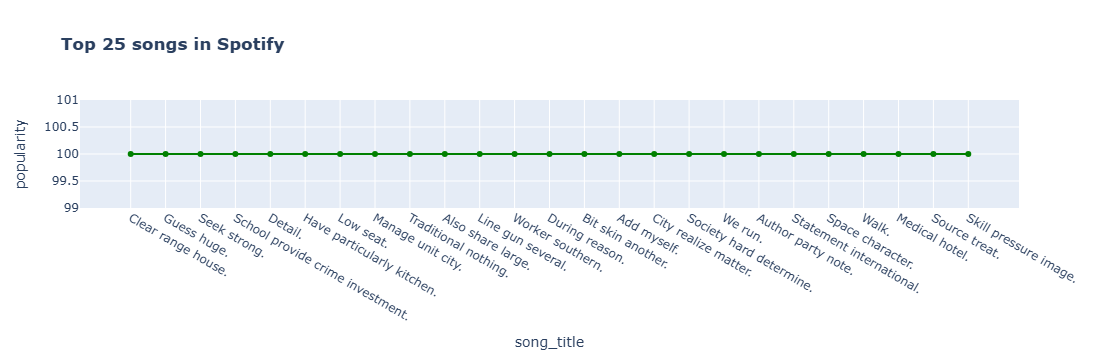

In [57]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),
            x='song_title',y='popularity',hover_data=['artist'],
            color_discrete_sequence=['green'],
            markers=True,title='<b> Top 25 songs in Spotify')
fig.show()